In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


In [26]:
Draft_Phase = pd.read_csv("../data/vct_2021/matches/draft_phase.csv")
eco_rounds = pd.read_csv("../data/vct_2021/matches/eco_rounds.csv")
eco_stats = pd.read_csv("../data/vct_2021/matches/eco_stats.csv")


In [27]:
eco_rounds.head(n=10)

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Team,Loadout Value,Remaining Credits,Type,Outcome
0,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,1,Vision Strikers,3.9k,0.4k,Eco: 0-5k,Win
1,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,1,FULL SENSE,3.4k,0.2k,Eco: 0-5k,Loss
2,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,2,Vision Strikers,14.4k,5.2k,Semi-buy: 10-20k,Win
3,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,2,FULL SENSE,2.4k,8.4k,Eco: 0-5k,Loss
4,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,3,Vision Strikers,17.6k,15.2k,Semi-buy: 10-20k,Loss
5,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,3,FULL SENSE,19.9k,0.9k,Semi-buy: 10-20k,Win
6,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,4,Vision Strikers,22.6k,4.7k,Full buy: 20k+,Win
7,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,4,FULL SENSE,21.7k,9.0k,Full buy: 20k+,Loss
8,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,5,Vision Strikers,22.0k,4.2k,Full buy: 20k+,Win
9,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,5,FULL SENSE,10.0k,10.2k,Semi-buy: 10-20k,Loss


In [39]:
#print(eco_rounds.Stage)
df = eco_rounds.loc[(eco_rounds["Stage"]=="Group Stage")& (eco_rounds["Tournament"]=="Valorant Champions 2021")]
df2 = eco_rounds.loc[(eco_rounds["Stage"]=="Playoffs")& (eco_rounds["Tournament"]=="Valorant Champions 2021")]
print(len(eco_rounds))
print(len(df))
print(len(df2))
#print(spEco)


360734
2110
868


Function convert_to_int which changes values like $21.5k$ to a number.

In [40]:
def convert_to_int(word:str)->float:
    return float(word.replace("k", ""))

#convert_to_int(df[ "Loadout Value"][3])

df["Loadout Value"]=df["Loadout Value"].apply(convert_to_int)
df["Remaining Credits"]=df["Remaining Credits"].apply(convert_to_int)
df2["Loadout Value"]=df2["Loadout Value"].apply(convert_to_int)
df2["Remaining Credits"]=df2["Remaining Credits"].apply(convert_to_int)


C:\Users\parab\AppData\Local\Temp\ipykernel_11976\2166024338.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Loadout Value"]=df["Loadout Value"].apply(convert_to_int)
C:\Users\parab\AppData\Local\Temp\ipykernel_11976\2166024338.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Remaining Credits"]=df["Remaining Credits"].apply(convert_to_int)
C:\Users\parab\AppData\Local\Temp\ipykernel_11976\2166024338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [41]:

df["Spent Credits"] = df["Loadout Value"] 
df2["Spent Credits"] = df2["Loadout Value"] 

C:\Users\parab\AppData\Local\Temp\ipykernel_11976\1539122318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Spent Credits"] = df["Loadout Value"]
C:\Users\parab\AppData\Local\Temp\ipykernel_11976\1539122318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Spent Credits"] = df2["Loadout Value"]


In [44]:
for i in df.index:
    if i%2==0:
        df["Spent Credits"][i] = df["Loadout Value"][i]-df["Loadout Value"][i+1]
    else:
        df["Spent Credits"][i] = df["Loadout Value"][i]-df["Loadout Value"][i-1]

for i in df2.index:
    if i%2==0:
        df2["Spent Credits"][i] = df2["Loadout Value"][i]-df2["Loadout Value"][i+1]
    else:
        df2["Spent Credits"][i] = df2["Loadout Value"][i]-df2["Loadout Value"][i-1]


df.head()
df2.head()


C:\Users\parab\AppData\Local\Temp\ipykernel_11976\953708961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Spent Credits"][i] = df["Loadout Value"][i]-df["Loadout Value"][i+1]
C:\Users\parab\AppData\Local\Temp\ipykernel_11976\953708961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Spent Credits"][i] = df["Loadout Value"][i]-df["Loadout Value"][i-1]
C:\Users\parab\AppData\Local\Temp\ipykernel_11976\953708961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Team,Loadout Value,Remaining Credits,Type,Outcome,Spent Credits
2110,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,1,Acend,4.1,0.2,Eco: 0-5k,Win,0.3
2111,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,1,Team Secret,3.8,0.2,Eco: 0-5k,Loss,-0.3
2112,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,2,Acend,17.0,1.3,Semi-buy: 10-20k,Win,13.9
2113,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,2,Team Secret,3.1,8.1,Eco: 0-5k,Loss,-13.9
2114,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,3,Acend,18.5,4.6,Semi-buy: 10-20k,Win,-2.0


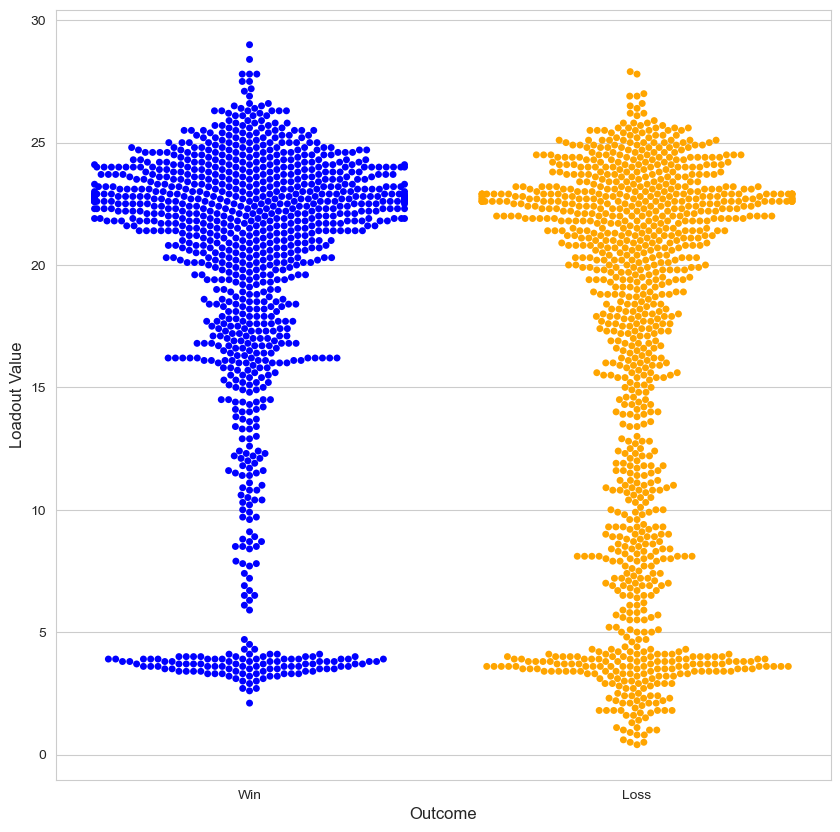

In [45]:
## Make a figure object
plt.figure(figsize=(10, 10))

## Call swarmplot
## First put in the dataframe in data = 
## Then what you want on the x and y axis
## Finally, palette, an optional input, allows me to color the points
sns.swarmplot(data=df,
               x = 'Outcome',
               y = 'Loadout Value',
            hue='Outcome',
            palette=['blue', 'orange'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Loadout Value", fontsize=12)

plt.show()

c:\Users\parab\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\parab\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\parab\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\parab\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


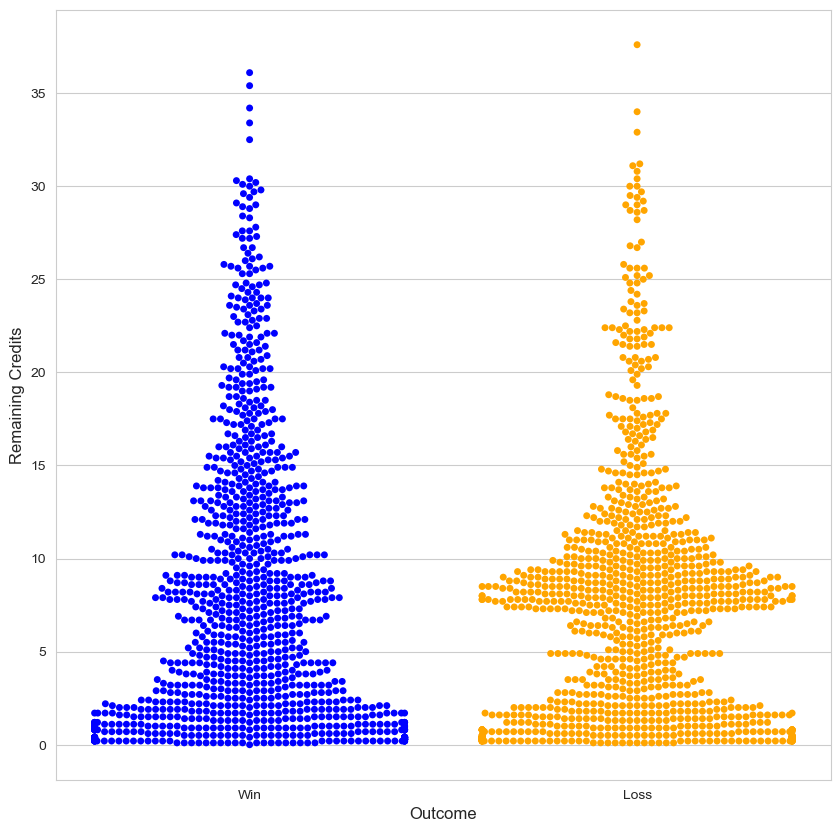

In [34]:
## Make a figure object
plt.figure(figsize=(10, 10))

## Call swarmplot
## First put in the dataframe in data = 
## Then what you want on the x and y axis
## Finally, palette, an optional input, allows me to color the points
sns.swarmplot(data=df,
               x = 'Outcome',
               y = 'Remaining Credits',
            hue='Outcome',
            palette=['blue', 'orange'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Remaining Credits", fontsize=12)

plt.show()

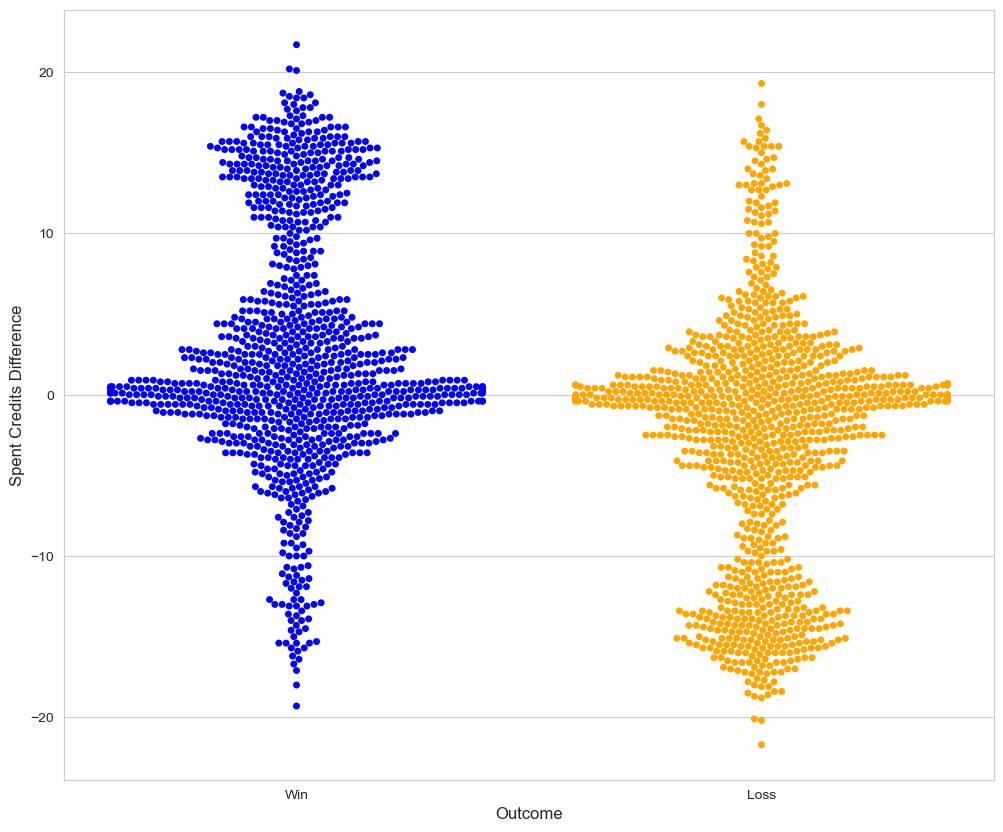

In [48]:
## Make a figure object
plt.figure(figsize=(12,10))

## Call swarmplot
## First put in the dataframe in data = 
## Then what you want on the x and y axis
## Finally, palette, an optional input, allows me to color the points
sns.swarmplot(data=df,
               x = 'Outcome',
               y = 'Spent Credits',
            hue='Outcome',
            palette=['blue', 'orange'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Spent Credits Difference", fontsize=12)

plt.show()

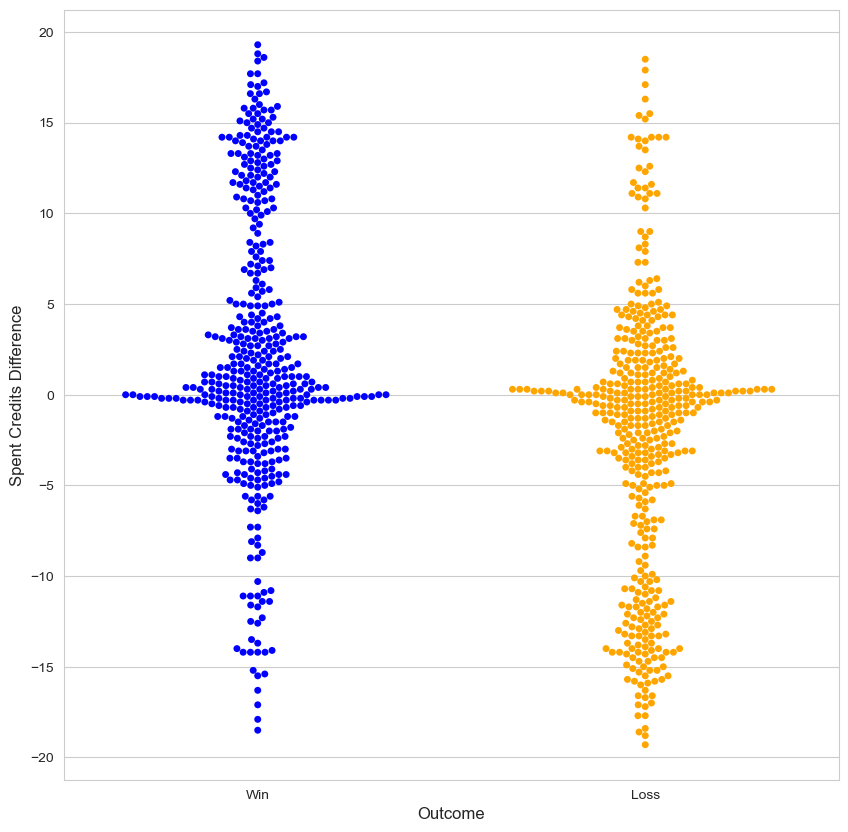

In [47]:
## Make a figure object
plt.figure(figsize=(10,10))

## Call swarmplot
## First put in the dataframe in data = 
## Then what you want on the x and y axis
## Finally, palette, an optional input, allows me to color the points
sns.swarmplot(data=df2,
               x = 'Outcome',
               y = 'Spent Credits',
            hue='Outcome',
            palette=['blue', 'orange'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Spent Credits Difference", fontsize=12)

plt.show()

A typical ranked match is of best of 25 rounds. One team starts as the attacker and the other as the defender. At the end of 12 rounds, these roles switch. In the first round and the 13th rounds both teams start with 4k credits (800 each).  Credits can be used to buy guns with more money usually means better guns. With each kill players are awarded with 200 credits and the winning team of the round gets 15k credits (3k each). Losing team gets 5k credits (1k each) but if a team is on a losing streak, it gets more credits (but still less than the winning team).  There are other objectives that also award credits. 
We are interested in analyzing the spending behavior of teams and how it correlates to a winning round. Basic hypothesis would be a team that spends more has a more chance of winning. We can also compare the difference in the spendings to the wins. We also have to acknowledge that spending in a round is not independent from the other rounds, since players carry over the guns that they haven’t lost. So, a team may not spend but still have enough or even more ammo than the other team. We would like to take this into account as well.  
There is a cap of 9k credits per player. This might also affect the spending behavior. Going on a winning streak or a losing streak might affect the spending behavior.